# Electricity mix

This notebook allows you to plot the electricity mix over from roughly 1985 to 2022. The source is [Hannah Ritchie's website **"Our World in Data"**](https://ourworldindata.org). Unfortunately the electrict-mix page misses the last 20 year of nuclear for the United Arab Emirates. Hence the need to merge two sets to augment this problem.

 * https://ourworldindata.org/nuclear-energy
 * https://ourworldindata.org/electricity-mix

_Source_ \
Ember - Yearly Electricity Data (2023), Ember - European Electricity Review (2022) – with major processing by Our World in Data

_Last updated_ \
December 12, 2023

_Date range_ \
1985–2022

_Unit_ \
terawatt-hours

In [1]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
my_data=pd.read_csv('/home/jan/Data-Science/Energy/electricity-prod-source-stacked.csv')

In [3]:
entities = my_data['Entity'].unique().tolist()
print('There are: ', len(entities), 'countries in the dataset')

There are:  243 countries in the dataset


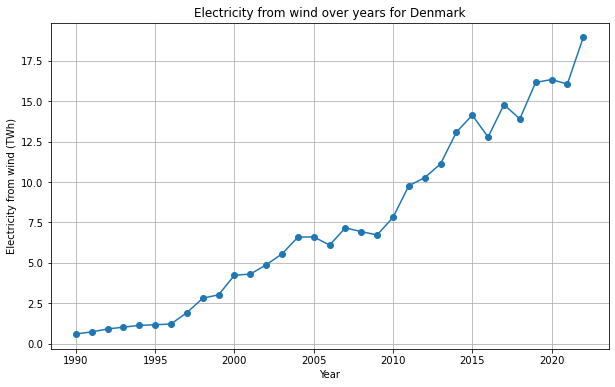

In [4]:
#%%script false --no-raise-error

# Assuming your DataFrame is named 'my_data'
# Plotting data for a specific entity (replace 'Danmark' with the entity you want to visualize)
entity_data = my_data[my_data['Entity'] == 'Denmark']

# Extracting data for electricity from wind for the selected entity
wind_data = entity_data[['Year', 'Electricity from wind - TWh (adapted for visualization of chart electricity-prod-source-stacked)']]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(wind_data['Year'], wind_data.iloc[:, 1], marker='o', linestyle='-')
plt.title('Electricity from wind over years for Denmark')
plt.xlabel('Year')
plt.ylabel('Electricity from wind (TWh)')
plt.grid(True)
plt.show()

In [5]:
wind_data.set_index('Year', inplace=True)
solar_data = entity_data[['Year', 'Electricity from solar - TWh (adapted for visualization of chart electricity-prod-source-stacked)']]
solar_data.set_index('Year', inplace=True)

In [6]:
wind_data.head()

Electricity from wind - TWh (adapted for visualization of chart electricity-prod-source-stacked)
Year                                                                                                  
1990                                               0.61                                               
1991                                               0.74                                               
1992                                               0.92                                               
1993                                               1.03                                               
1994                                               1.14

In [7]:
renewables = pd.merge(solar_data, wind_data, on='Year', how='outer')

In [8]:
renewables.rename(columns={'Electricity from solar - TWh (adapted for visualization of chart electricity-prod-source-stacked)':'Solar_DK'}, inplace=True)
renewables.rename(columns={'Electricity from wind - TWh (adapted for visualization of chart electricity-prod-source-stacked)':'Wind_DK'}, inplace=True)

In [9]:
renewables.head()

Solar_DK  Wind_DK
Year                   
1990       0.0     0.61
1991       0.0     0.74
1992       0.0     0.92
1993       0.0     1.03
1994       0.0     1.14

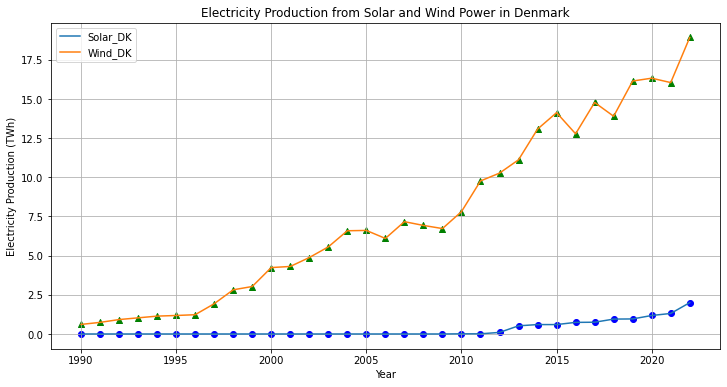

In [10]:
# Plot the data
renewables.plot(kind='line', figsize=(12, 6))
plt.grid(True)
plt.scatter(renewables.index, renewables['Solar_DK'], color='blue', marker='o')
plt.scatter(renewables.index, renewables['Wind_DK'], color='green', marker='^')
plt.title('Electricity Production from Solar and Wind Power in Denmark')
plt.xlabel('Year')
plt.ylabel('Electricity Production (TWh)')
plt.legend()
plt.show()

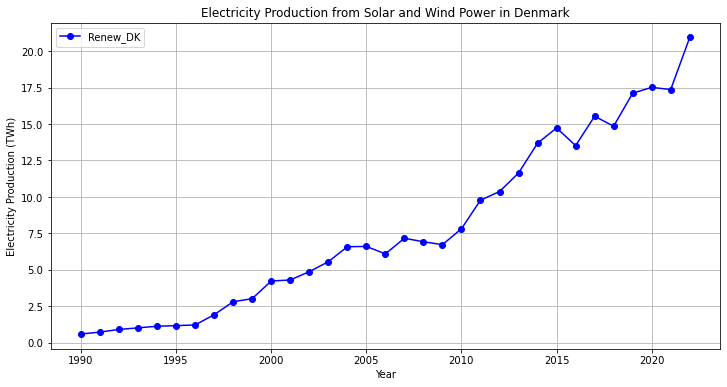

In [11]:
renewables['Renew_DK'] = renewables['Solar_DK'] + renewables['Wind_DK']
# Plot the total electricity production
renewables['Renew_DK'].plot(kind='line', figsize=(12, 6), color='blue', marker='o')
plt.title('Electricity Production from Solar and Wind Power in Denmark')
plt.xlabel('Year')
plt.ylabel('Electricity Production (TWh)')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
entity_data = my_data[my_data['Entity'] == 'Portugal']
solar_data = entity_data[['Year', 'Electricity from solar - TWh (adapted for visualization of chart electricity-prod-source-stacked)']]
wind_data = entity_data[['Year', 'Electricity from wind - TWh (adapted for visualization of chart electricity-prod-source-stacked)']]
wind_data.set_index('Year', inplace=True)
solar_data.set_index('Year', inplace=True)
renewables_PT = pd.merge(solar_data, wind_data, on='Year', how='outer')
renewables_PT.rename(columns={'Electricity from solar - TWh (adapted for visualization of chart electricity-prod-source-stacked)':'Solar_PT'}, inplace=True)
renewables_PT.rename(columns={'Electricity from wind - TWh (adapted for visualization of chart electricity-prod-source-stacked)':'Wind_PT'}, inplace=True)

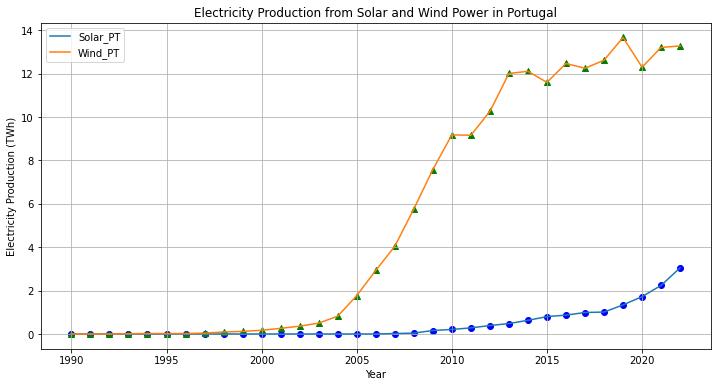

In [13]:
renewables_PT.plot(kind='line', figsize=(12, 6))
plt.scatter(renewables_PT.index, renewables_PT['Solar_PT'], color='blue', marker='o')
plt.scatter(renewables_PT.index, renewables_PT['Wind_PT'], color='green', marker='^')
plt.title('Electricity Production from Solar and Wind Power in Portugal')
plt.xlabel('Year')
plt.ylabel('Electricity Production (TWh)')
plt.legend()
plt.grid(True)
plt.show()

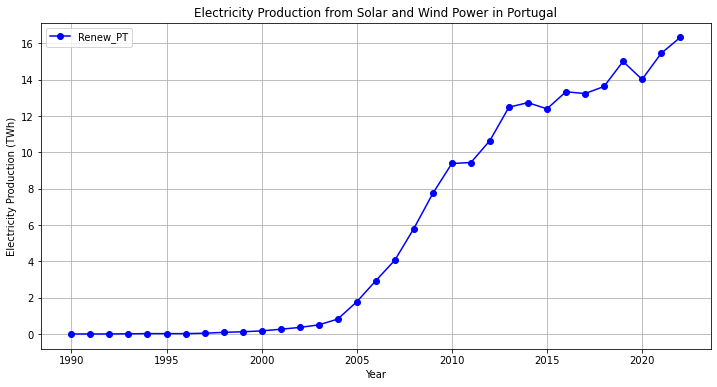

In [14]:
renewables_PT['Renew_PT'] = renewables_PT['Solar_PT'] + renewables_PT['Wind_PT']
# Plot the total electricity production
renewables_PT['Renew_PT'].plot(kind='line', figsize=(12, 6), color='blue', marker='o')
plt.title('Electricity Production from Solar and Wind Power in Portugal')
plt.xlabel('Year')
plt.ylabel('Electricity Production (TWh)')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
renewables_PT.tail()

Solar_PT  Wind_PT  Renew_PT
Year                             
2018      1.01    12.62     13.63
2019      1.34    13.67     15.01
2020      1.72    12.30     14.02
2021      2.24    13.21     15.45
2022      3.05    13.28     16.33

In [16]:
renewables = pd.merge(renewables, renewables_PT, on='Year', how='outer')
renewables.tail()

Solar_DK  Wind_DK  Renew_DK  Solar_PT  Wind_PT  Renew_PT
Year                                                          
2018      0.95    13.90     14.85      1.01    12.62     13.63
2019      0.96    16.15     17.11      1.34    13.67     15.01
2020      1.18    16.33     17.51      1.72    12.30     14.02
2021      1.31    16.05     17.36      2.24    13.21     15.45
2022      2.00    18.93     20.93      3.05    13.28     16.33

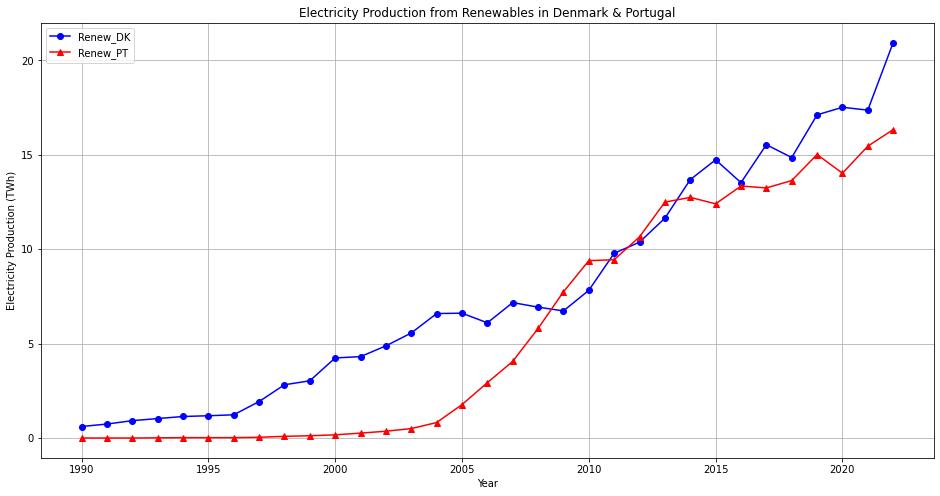

In [17]:
renewables_filtered = renewables[['Renew_DK', 'Renew_PT']]
plt.figure(figsize=(16, 8))
renewables_filtered['Renew_DK'].plot(kind='line', marker='o', linestyle='-', color='blue')
renewables_filtered['Renew_PT'].plot(kind='line', marker='^', linestyle='-', color='red')
plt.title('Electricity Production from Renewables in Denmark & Portugal')
plt.xlabel('Year')
plt.ylabel('Electricity Production (TWh)')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
my_data=pd.read_csv('/home/jan/Data-Science/Energy/nuclear-energy-generation.csv')
display(my_data)

Entity Code  Year  Electricity from nuclear - TWh
0     ASEAN (Ember)  NaN  2000                             0.0
1     ASEAN (Ember)  NaN  2001                             0.0
2     ASEAN (Ember)  NaN  2002                             0.0
3     ASEAN (Ember)  NaN  2003                             0.0
4     ASEAN (Ember)  NaN  2004                             0.0
...             ...  ...   ...                             ...
9551       Zimbabwe  ZWE  2018                             0.0
9552       Zimbabwe  ZWE  2019                             0.0
9553       Zimbabwe  ZWE  2020                             0.0
9554       Zimbabwe  ZWE  2021                             0.0
9555       Zimbabwe  ZWE  2022                             0.0

[9556 rows x 4 columns]

In [19]:
entities = my_data['Entity'].unique().tolist()
print('There are: ', len(entities), 'countries in the dataset')

There are:  254 countries in the dataset


In [20]:
entity_data = my_data[my_data['Entity'] == 'United Arab Emirates']
entity_data.tail()

Entity Code  Year  Electricity from nuclear - TWh
8936  United Arab Emirates  ARE  2018                            0.00
8937  United Arab Emirates  ARE  2019                            0.00
8938  United Arab Emirates  ARE  2020                            1.63
8939  United Arab Emirates  ARE  2021                           10.55
8940  United Arab Emirates  ARE  2022                           20.10

In [21]:
#JBRv 
#The SettingWithCopyWarning will be raised because we're trying to modify a slice of a DataFrame in place. 
#This will create a copy of the DataFrame, which can be inefficient for large datasets. 
#To avoid this warning, you can copy the DataFrame explicitly before modifying it using the .copy() method
#JBR^
nuclear_data = entity_data[['Year', 'Electricity from nuclear - TWh']].copy()
nuclear_data.rename(columns={'Electricity from nuclear - TWh':'Nuclear_UAE'}, inplace=True)
nuclear_data.set_index('Year', inplace=True)
nuclear_data.tail()

Nuclear_UAE
Year             
2018         0.00
2019         0.00
2020         1.63
2021        10.55
2022        20.10

In [22]:
start_year = renewables_filtered.index.min()
end_year = renewables_filtered.index.max()
print(start_year, end_year)

1990 2022


In [23]:
electricity_mix = pd.merge(renewables, nuclear_data, on='Year', how='inner')
display(electricity_mix)

Solar_DK  Wind_DK  Renew_DK  Solar_PT  Wind_PT  Renew_PT  Nuclear_UAE
Year                                                                       
1990      0.00     0.61      0.61      0.00     0.00      0.00         0.00
1991      0.00     0.74      0.74      0.00     0.00      0.00         0.00
1992      0.00     0.92      0.92      0.00     0.00      0.00         0.00
1993      0.00     1.03      1.03      0.00     0.01      0.01         0.00
1994      0.00     1.14      1.14      0.00     0.02      0.02         0.00
1995      0.00     1.18      1.18      0.00     0.02      0.02         0.00
1996      0.00     1.23      1.23      0.00     0.02      0.02         0.00
1997      0.00     1.93      1.93      0.00     0.04      0.04         0.00
1998      0.00     2.82      2.82      0.00     0.09      0.09         0.00
1999      0.00     3.03      3.03      0.00     0.12      0.12         0.00
2000      0.00     4.24      4.24      0.00     0.17      0.17         0.00
2001      0.00     4.31      4.31      0.00     0.26      0.26         0.00
2002      0.00     4.88      4.88      0.00     0.36      0.36         0.00
2003      0.00     5.56      5.56      0.00     0.50      0.50         0.00
2004      0.00     6.59      6.59      0.00     0.82      0.82         0.00
2005      0.00     6.61      6.61      0.00     1.77      1.77         0.00
2006      0.00     6.10      6.10      0.00     2.93      2.93         0.00
2007      0.00     7.17      7.17      0.02     4.04      4.06         0.00
2008      0.00     6.93      6.93      0.04     5.76      5.80         0.00
2009      0.00     6.73      6.73      0.16     7.58      7.74         0.00
2010      0.01     7.81      7.82      0.21     9.18      9.39         0.00
2011      0.01     9.77      9.78      0.28     9.16      9.44         0.00
2012      0.10    10.27     10.37      0.39    10.26     10.65         0.00
2013      0.52    11.12     11.64      0.48    12.01     12.49         0.00
2014      0.60    13.08     13.68      0.63    12.11     12.74         0.00
2015      0.60    14.13     14.73      0.80    11.60     12.40         0.00
2016      0.74    12.78     13.52      0.87    12.47     13.34         0.00
2017      0.75    14.78     15.53      0.99    12.25     13.24         0.00
2018      0.95    13.90     14.85      1.01    12.62     13.63         0.00
2019      0.96    16.15     17.11      1.34    13.67     15.01         0.00
2020      1.18    16.33     17.51      1.72    12.30     14.02         1.63
2021      1.31    16.05     17.36      2.24    13.21     15.45        10.55
2022      2.00    18.93     20.93      3.05    13.28     16.33        20.10

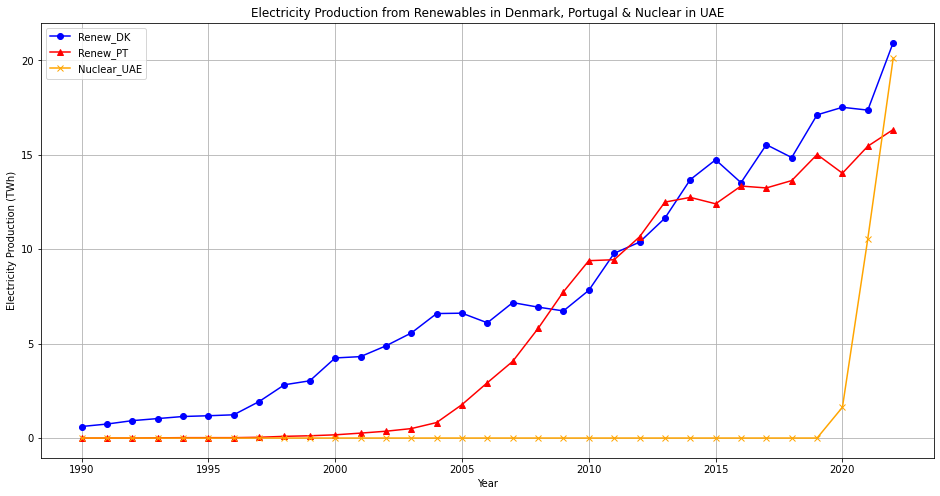

In [24]:
electricity_mix_filtered = electricity_mix[['Renew_DK', 'Renew_PT','Nuclear_UAE']]
plt.figure(figsize=(16, 8))
electricity_mix_filtered['Renew_DK'].plot(kind='line', marker='o', linestyle='-', color='blue')
electricity_mix_filtered['Renew_PT'].plot(kind='line', marker='^', linestyle='-', color='red')
electricity_mix_filtered['Nuclear_UAE'].plot(kind='line', marker='x', linestyle='-', color='orange')
plt.title('Electricity Production from Renewables in Denmark, Portugal & Nuclear in UAE')
plt.xlabel('Year')
plt.ylabel('Electricity Production (TWh)')
plt.legend()
plt.grid(True)
plt.savefig('electricity-mix-DK-PT-UAE.jpg', bbox_inches='tight', dpi=300)
plt.savefig('electricity-mix-DK-PT-UAE.png', bbox_inches='tight', dpi=300)
plt.savefig('electricity-mix-DK-PT-UAE.pdf', bbox_inches='tight', dpi=300)
plt.show()